In [236]:
# note: text
# fixed: text
# fix me: text
# error: text
# summary: text

In [251]:
#Loader function for Pytorch Dataset Folder thingy
def load_data(path: str):
    #print(f"Loading file: {path}")
    tensor = torch.load(path)
    #tensor = tensor.float()
    #print(f"Loaded tensor type: {type(tensor)} {tensor.type()}")
    return tensor


#ERROR DOESNT FULLY WORK WITH DATASET - IDK WHY - I GAVE UP FOR NOW
#FIXME THIS DOES WORK AS A REGULAR REMAP AND I USE THIS FOR PRINTING DATA
#NOTE TO SELF: DO NOT DELETE THIS FUNCTION
# Define a custom transform to convert labels from float to int
def label_remap(label):
    label_mapping = {
            0: 47,            1: 23,            2: 27,            3: 34,            4: 43,
            5: 5,            6: 41,            7: 14,            8: 46,            9: 22,
            10: 37,            11: 38,            12: 24,            13: 3,            14: 12,
            15: 13,            16: 9,            17: 20,            18: 0,            19: 33,
            20: 30,            21: 29,            22: 44,            23: 48,            24: 25,
            25: 4,            26: 39,            27: 49,            28: 40,            29: 6,
            30: 7,            31: 32,            32: 26,            33: 31,            34: 2,
            35: 17,            36: 10,            37: 1,            38: 11,            39: 8,
            40: 42,            41: 21,            42: 28,            43: 19,            44: 18,
            45: 45,            46: 36,            47: 35,            48: 15,            49: 16
    }
    return torch.tensor(int(label_mapping[label]))


#Summary: Print All Samples in Dataloader
#Summary: Data Label OG = this is the published index labling, dog = 4
#Summary; because pytorch sorts the data, dog = 18 in Dataloader,
#Summary: so if i want to double check that the labels are correct, I have to use label_remap() function to convert the pytorch label number to the original
#Summary: this doesnt really matter, all the code below was to just do a double check that everything is correct

def print_data_loader(_dataloader,_stop,class_names):
    if _dataloader.batch_size >1:
        print("Sorry, This function doesn't support batch size dataset, please use batch = 1")
        return
    
    _idx =          f"{'#':<{4}} | "
    _dshape =          f"{'Data Shape:[N, C,  H,   W]':<{24}} | "
    _lshape =          f"{'Label Shape':<{15}} | "
    _ddtype =          f"{'Data DataType':<{13}} | "
    _dlabel1 =         f"{'Data Label OG':<{13}} | "
    _dlabel2 =         f"{'Data Label Py':<{13}} | "
    _dlabel3 =         f"{'Data Label ':<{20}} | "
    _ldtype =          f"{'Label Type':<{22}} | "
    _dpath =           f"{'Data Path + Label PyTorch Value':<{60}} | "
    
    print(f"{_idx}{_dshape}{_lshape}{_ddtype}{_dlabel1}{_dlabel2}{_dlabel3}{_dpath}{_ldtype}")
    
    #Note: CREATE AN ITERATOR FOR DATALOADER
    _data_iter = iter(_dataloader)
    #next(_data_iter)
    counter = 1 #counter when to stop for loop
    #NOTE: GO OVER ALL SAMPLES IN ITERATOR
    for (_data, _label) in _data_iter:
        #_data_iter = iter(test_dataloader)
        _rnd_idx = _data_iter._sampler_iter.gi_frame.f_locals['idx']
        _sample_idx = _data_iter._dataset.indices[_rnd_idx]
        #numm = _data_iter._index_sampler.sampler.data_source.indices[num] #incorrect location
        _path = test_dataset.dataset.samples[_sample_idx]
        
        #NOTE: This is for debug to check that it is the same samples values
        #_amy_data = my_data_set[NUM2][0]
        #_amy_dataog =  _data[0]
        #diff =sum(sum(_amy_data - _amy_dataog)) 
        #print(diff)
        #print(_path)
        _idx =f"{counter:<{4}} | "
        _dshape = f"{str(_data.shape):<{24}} | " # = [batch_size, color_channels, height, width]"
        _lshape = f"{str(_label.shape):<{15}} | "
        _ddtype = f"{str(_data.dtype):<{13}} | "
        _dlabel1 = f"{str(label_remap(int(_label[0]))):<{13}} | "
        _dlabel2 = f"{str(_label):<{13}} | "
        _dlabel3 = f"{str(class_names[_label]):<{20}} | "
        _ldtype = f"{str(type(_label)):<{22}} | "
        _dpath =   f"{str(_path).split('/',6)[6]:<{60}} | "
    
        print(f"{_idx}{_dshape}{_lshape}{_ddtype}{_dlabel1}{_dlabel2}{_dlabel3}{_dpath}{_ldtype}")
        
        if counter == _stop:
            break
        else:
            counter=counter+1

# ALL CODE ABOVE IS FUNCTIONS FROM MFCC_DATA_IMPORT

In [252]:
import os
OutputFolder ="/Users/daniel/Desktop/Github/ESC_Dissertation_2024_EEE/MFCC/tensor3c/"
# Step 1: Create a dataset from the new organized folder

#from torchvision import transforms
#NHWC2NCHW = transforms.Compose([transforms.Lambda(lambda x: x.permute(0, 3, 1, 2))])  # from NHWC to NCHW
# Define a custom transform to add the extra dimension
# test_transform = transforms.Compose([
#     transforms.Lambda(lambda x: x.unsqueeze(0))  # Adds an extra dimension, making it [1, C, H, W]
# ])
import torch
from torchvision import datasets

my_data_set = datasets.DatasetFolder(
        root = OutputFolder,
        loader = load_data,
        transform = None, #use "test_transform" only if using coeff because its missing channels=1 dimention  #our transformation for data
        target_transform = None,
        extensions = ('.pt',)
)
#my_data_set.class_to_idx
#Step 2
# Determine the sizes for training and testing splits
# And Split the dataset

from torch.utils.data import random_split

train_size = int(0.7 * len(my_data_set))
test_size = len(my_data_set) - train_size

train_dataset, test_dataset = random_split(my_data_set, [train_size, test_size])


In [253]:
#step 3
# Turn train\test Datasets into train\test DataLoaders

#import os
#NUM_OF_WORKERS = os.cpu_count() #this is used on collab when I want to use all max cpu power
from torch.utils.data import DataLoader

BATCH_SIZE = 10
train_dataloader = DataLoader(dataset = train_dataset,
                              batch_size = BATCH_SIZE,  # how many samples per batch?
                              #num_workers=1,#ERROR THIS DOESNT WORK ON LAPTOP BUT WORKS ON COLLAB # how many CPU subprocesses to use for data loading? (higher = more)
                              shuffle = True)  # shuffle the data?

test_dataloader = DataLoader(dataset = test_dataset,
                             batch_size = BATCH_SIZE,  # how many samples per batch?
                             #num_workers=1,#ERROR THIS DOESNT WORK ON LAPTOP BUT WORKS ON COLLAB # how many CPU subprocesses to use for data loading? (higher = more)
                             shuffle = True)  # shuffle the data?

In [254]:
class_names = my_data_set.classes
class_dict = my_data_set.class_to_idx
print(f"'Class Label': Label Number \n{class_dict}")

'Class Label': Label Number 
{'airplane': 0, 'breathing': 1, 'brushing_teeth': 2, 'can_opening': 3, 'car_horn': 4, 'cat': 5, 'chainsaw': 6, 'chirping_birds': 7, 'church_bells': 8, 'clapping': 9, 'clock_alarm': 10, 'clock_tick': 11, 'coughing': 12, 'cow': 13, 'crackling_fire': 14, 'crickets': 15, 'crow': 16, 'crying_baby': 17, 'dog': 18, 'door_wood_creaks': 19, 'door_wood_knock': 20, 'drinking_sipping': 21, 'engine': 22, 'fireworks': 23, 'footsteps': 24, 'frog': 25, 'glass_breaking': 26, 'hand_saw': 27, 'helicopter': 28, 'hen': 29, 'insects': 30, 'keyboard_typing': 31, 'laughing': 32, 'mouse_click': 33, 'pig': 34, 'pouring_water': 35, 'rain': 36, 'rooster': 37, 'sea_waves': 38, 'sheep': 39, 'siren': 40, 'sneezing': 41, 'snoring': 42, 'thunderstorm': 43, 'toilet_flush': 44, 'train': 45, 'vacuum_cleaner': 46, 'washing_machine': 47, 'water_drops': 48, 'wind': 49}


In [255]:
print(f"Train DataLoader Samples:\t{len(train_dataloader)}*{train_dataloader.batch_size},\t\tTest DataLoader Samples:\t{len(test_dataloader)}*{test_dataloader.batch_size}.")
print(f"Train DataSet Samples:\t\t{len(train_dataset)},\t\tTest DataSet Samples:\t\t{len(test_dataset)}.")

Train DataLoader Samples:	140*10,		Test DataLoader Samples:	60*10.
Train DataSet Samples:		1400,		Test DataSet Samples:		600.


In [256]:
print_data_loader(test_dataloader, 1,class_names ) # DOESNT WORK WHEN BATCH SIZE IS > 1

Sorry, This function doesn't support batch size dataset, please use batch = 1


In [258]:
print_data_loader(train_dataloader, 5,class_names )

Sorry, This function doesn't support batch size dataset, please use batch = 1


# CREATING A MODEL USING PYTORCH SEQUENIAL

In [194]:
# Import torch
import torch

# Setup device agnostic code
#device agnostic code - automatically set what cpu\gpu to use for best performance
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

# Setup random seed
#RANDOM_SEED = 42

Using device: mps


In [195]:
import torch
from torch import nn
from torchmetrics import Accuracy

In [275]:

class PiczakRec(nn.Module):
    def __init__(self,inputSize,outputSize,hiddenNeurons,filtersize,poolingsize,padsize,stridesize,flattensize):
        super().__init__()

        self.nnBlock1 = nn.Sequential(
                nn.Conv2d(in_channels=inputSize,out_channels=40,kernel_size=(8,1),padding=0),
                nn.BatchNorm2d(40),
                
                nn.Conv2d(in_channels=40,out_channels=40,kernel_size=(8,1),padding=0),
                nn.BatchNorm2d(40),
                
                nn.MaxPool2d(1,160),
                

                
                nn.ReLU(),
                #nn.MaxPool2d(kernel_size=(4,3),stride=(1,3)),
        )    
        
        self.nnBlock2 = nn.Sequential(
                nn.Conv2d(in_channels=80,out_channels=80,kernel_size=(1,3),padding=0,stride = 1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=(1,3),stride=(1,3))
        )    
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=160,out_features=100),
            #nn.Linear(in_features=5000,out_features=5000),
            nn.Linear(in_features=100,out_features=50)
        )
        
    def forward(self, x):
        x = self.nnBlock1(x)
        #x = self.nnBlock2(x)
        x = self.classifier(x)
        return x
            

In [276]:
inputSize=3#how many color channels, in my case 1
outputSize=50
hiddenNeurons=1
filtersize=3
poolingsize=2
padsize=0
stridesize=1
flattensize=3528
model = PiczakRec(inputSize,outputSize,hiddenNeurons,filtersize,poolingsize,padsize,stridesize,flattensize)

In [277]:
#Note: Used for debugging

#model.state_dict()
#next(model.modules())
# model.eval()
# coeff,y = next(iter(test_dataloader))
# if torch.numel(torch.tensor(coeff.shape)) == 4:
#     model_pred_logits = model(coeff[0]).squeeze(dim=0) # make sure image is right shape + on right device
#     model_pred_probs = torch.softmax(model_pred_logits, dim=1)
#     model_pred_label = torch.argmax(model_pred_probs, dim=1)
# else:
#     model_pred_logits = model(coeff).squeeze(dim=0) # make sure image is right shape + on right device
#     model_pred_probs = torch.softmax(model_pred_logits, dim=1)
#     model_pred_label = torch.argmax(model_pred_probs, dim=1)
# coeff.shape

# INIT TENSORBOARD & SETUP
Dashboard: [http://localhost:6006](http://localhost:6006)



In [278]:
import torch.utils.tensorboard
# Load the TensorBoard notebook extension
%load_ext tensorboard
# Stand Tensorboard
%tensorboard --logdir=runs --reload_multifile True

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Launching TensorBoard...

In [279]:
#Create a SummyWriter which is LOG FILE DATABASE for our model
#CHANGE THE NAME BASED ON THE MODEL WE USE - DONT FORGET
from torch.utils.tensorboard import SummaryWriter
# default `log_dir` is "runs" - we'll be more specific here
#_MODEL_NAME_ = "model1_test_trash"
#writer = SummaryWriter("runs/" + _MODEL_NAME_)

In [280]:
# NOTE: SETUP METRICS USING TORCH LIBRARY - NOT SURE IF THIS MAKES IT EASIER OR NOT 
acc_func = Accuracy(task="multiclass", num_classes=50).to(device)

# NOTE: SETUP TQDM TO SHOW A PROGRESS BAR
from tqdm.auto import tqdm 

#Summary 1: Create Model
model = model.to(device)

#Summary 2: Create Loss Function & Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

#Summary 3: Setup SummaryWriter
from torch.utils.tensorboard import SummaryWriter
_MODEL_NAME_ = "model50_test_trash" #NOTE: CHANGE ME
writer = SummaryWriter("runs/" + _MODEL_NAME_)

### Training loop
epochs = 50
for epoch in tqdm(range(epochs)):

    train_loss = 0
    train_acc = 0
    
    #ii TRAINING loop
    for batch, (X, y) in enumerate(tqdm(train_dataloader)):
        #Note 0. Turn On Training Mode
        model.train()
        #Note 0.1. Put data on CPU
        X = X.to(device)
        y = y.to(device)

        #Note 0.2. Check That Data has values - #ERROR This can be deleted quite honestly
        if torch.isnan(X).any() or torch.isinf(X).any():
            print("Data contains NaN or Inf values.")

        #Note 1. Forward pass
        logits = model(X)
        #Note 1.1 Convert Raw Logit Outputs to y predictions
        y_pred = torch.softmax(logits, dim = 1)  #;print(y_pred.shape)
        #Note 1.2 Convert y predictions to labels as y hat
        y_hat = torch.argmax(y_pred, dim = 1)  #;print(y_hat.shape);print(y_hat)

        #Note 2. Loss calculation
        loss = loss_fn(logits, y)
        #Note 2.1 Cumulatively add up the LOSS per epoch
        train_loss += loss
        #Note 2.1 Cumulatively add up the ACCURACY per epoch
        train_acc += acc_func(y, y_hat)  #this slows down the runtime?

        #Note 3. Optimizer zero grad - reset gradients
        optimizer.zero_grad()
        #Note 4. Loss backward - Backward propagation
        loss.backward()
        #Note 5. Step the optimizer - optimize\upgade weight\biases\paramters of kernels
        optimizer.step()

    #Summary: Adjust TRAIN LOSS & ACCURACY for number of batches 
    #SUMMARY: Meaning -> Divide total TRAIN LOSS & ACC by length of TRAIN DATALOADER = (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    #ii TESTING loop
    #Note 0. init Metric Params
    test_loss = 0
    test_acc = 0
    
    #Note 1. Put model in eval mode 
    model.eval()

    #Note 1.1 Turn on inference mode - best way currently to do evaluation
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            #Note 2. Make sure test data on CPU
            X_test, y_test = X_test.to(device), y_test.to(device)
            #Note 3. Forward Pass
            logits = model(X_test)
            #Note 3.1 Convert Raw Logits (outputs) to y predictions
            y_pred = torch.softmax(logits, dim = 1)  #;print(y_pred.shape)
            #Note 3.2 Convert y predictions to y labels as y hat
            y_hat = torch.argmax(y_pred, dim = 1)

            
            
            #Note 4. Calculate The Loss
            loss = loss_fn(logits, y_test)
            #Note 4.1 Cumulatively add up the LOSS per epoch (all batches)
            test_loss += loss
            #Note 4.2 Cumulatively add up the ACCURACY per epoch (all batches)
            test_acc += acc_func(y, y_hat)  #this slows down the runtime
        
        #Summary: Adjust TEST LOSS & ACCURACY for number of batches 
        #SUMMARY: Meaning -> Divide total TEST LOSS & ACC by length of TEST DATALOADER = (average loss per batch per epoch)
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss:.3f} | Train Acc: {train_acc * 100} | Test Acc: {test_acc * 100}")
    
    #Note: Tensorboard Logging
    #writer.add_scalar("Loss/Train", train_loss, epoch)
    #writer.add_scalar("Loss/Test", test_loss, epoch)
    #writer.add_scalar("Accuracy/Train", train_acc*100, epoch)
    #writer.add_scalar(tag = "Accuracy/Test", scalar_value = test_acc*100,global_step =  epoch)
    
    writer.add_scalars("Loss",{'Train':train_loss},epoch)
    writer.add_scalars("Loss",{'Test':test_loss},epoch)

    
    writer.add_scalars("Accuracy",{'Train':train_acc*100},epoch)
    writer.add_scalars("Accuracy",{'Test':test_acc*100},epoch)

    writer.add_scalars("Train Loss/Accuracy",{'Loss':train_loss},epoch)
    writer.add_scalars("Train Loss/Accuracy",{'Accuracy':train_acc*100},epoch)

    writer.add_scalars("Test Loss/Accuracy",{'Loss':test_loss},epoch)
    writer.add_scalars("Test Loss/Accuracy",{'Accuracy':test_acc*100},epoch)


    #Call flush() method to make sure that all pending events have been written to disk.
    writer.flush()

writer.close()

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 0 | Loss: 4.034 | Test loss: 3.897 | Train Acc: 2.2142858505249023 | Test Acc: 0.0


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 1 | Loss: 3.885 | Test loss: 3.855 | Train Acc: 3.4999985694885254 | Test Acc: 0.0


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 2 | Loss: 3.845 | Test loss: 3.839 | Train Acc: 3.571427583694458 | Test Acc: 7.66666316986084


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 3 | Loss: 3.820 | Test loss: 3.829 | Train Acc: 4.142855644226074 | Test Acc: 0.1666666716337204


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 4 | Loss: 3.800 | Test loss: 3.825 | Train Acc: 3.928570032119751 | Test Acc: 0.6666666865348816


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 5 | Loss: 3.799 | Test loss: 3.828 | Train Acc: 4.214284420013428 | Test Acc: 1.3333334922790527


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 6 | Loss: 3.770 | Test loss: 3.830 | Train Acc: 4.428569793701172 | Test Acc: 0.1666666716337204


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 7 | Loss: 3.778 | Test loss: 3.839 | Train Acc: 4.428569316864014 | Test Acc: 6.666664123535156


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 8 | Loss: 3.762 | Test loss: 3.829 | Train Acc: 4.928569316864014 | Test Acc: 0.0


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 9 | Loss: 3.764 | Test loss: 3.825 | Train Acc: 4.857141017913818 | Test Acc: 3.500000476837158


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 10 | Loss: 3.762 | Test loss: 3.846 | Train Acc: 4.928569316864014 | Test Acc: 6.999997138977051


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 11 | Loss: 3.745 | Test loss: 3.837 | Train Acc: 5.999997615814209 | Test Acc: 0.0


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 12 | Loss: 3.744 | Test loss: 3.881 | Train Acc: 4.714283466339111 | Test Acc: 7.499996662139893


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 13 | Loss: 3.743 | Test loss: 3.842 | Train Acc: 4.5714263916015625 | Test Acc: 0.5000000596046448


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 14 | Loss: 3.721 | Test loss: 3.851 | Train Acc: 6.357141494750977 | Test Acc: 7.499996662139893


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 15 | Loss: 3.723 | Test loss: 3.849 | Train Acc: 6.071425914764404 | Test Acc: 1.1666667461395264


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 16 | Loss: 3.737 | Test loss: 3.879 | Train Acc: 6.857142448425293 | Test Acc: 0.0


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 17 | Loss: 3.729 | Test loss: 3.846 | Train Acc: 5.785711288452148 | Test Acc: 1.8333336114883423


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 18 | Loss: 3.718 | Test loss: 3.862 | Train Acc: 5.714282989501953 | Test Acc: 2.333333730697632


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 19 | Loss: 3.714 | Test loss: 3.862 | Train Acc: 5.714282989501953 | Test Acc: 0.0


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 20 | Loss: 3.705 | Test loss: 3.874 | Train Acc: 6.357141494750977 | Test Acc: 0.3333333432674408


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 21 | Loss: 3.703 | Test loss: 3.881 | Train Acc: 6.0714263916015625 | Test Acc: 0.0


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 22 | Loss: 3.712 | Test loss: 3.868 | Train Acc: 5.85714054107666 | Test Acc: 0.0


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 23 | Loss: 3.703 | Test loss: 3.863 | Train Acc: 6.9285688400268555 | Test Acc: 0.0


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 24 | Loss: 3.696 | Test loss: 3.882 | Train Acc: 6.571427822113037 | Test Acc: 1.3333334922790527


  0%|          | 0/140 [00:00<?, ?it/s]

Epoch: 25 | Loss: 3.696 | Test loss: 3.883 | Train Acc: 6.214284896850586 | Test Acc: 0.3333333432674408


  0%|          | 0/140 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [281]:
#Add Model Structure To TensorBoard
coeff,y = next(iter(test_dataloader))
writer.add_graph(model, coeff.to(device))
writer.close()

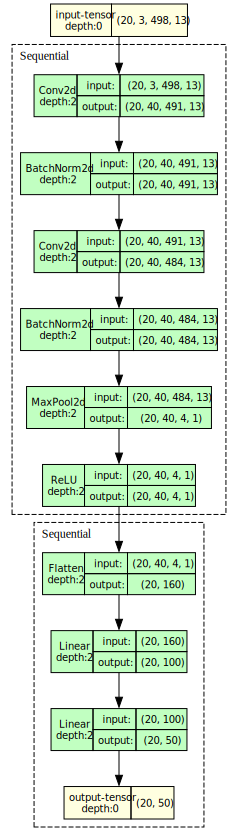

In [283]:

#Summary: Plot The Model Structure & Sizes
from torchview import draw_graph
N = 20;C = 3;H=498;W = 13
input_data = torch.randn(N,C,H,W)
viz_model = PiczakRec(C,0,0,0,0,0,0,0)

model_graph = draw_graph(viz_model,input_data,expand_nested=True, roll=True,graph_name='MLP',hide_inner_tensors=True,hide_module_functions=True)
model_graph.visual_graph

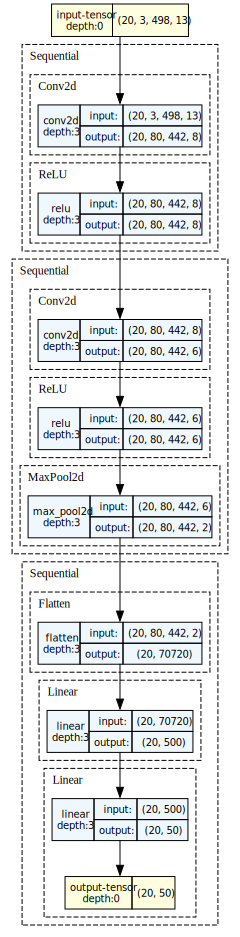

In [212]:
model_graph = draw_graph(viz_model,input_data,expand_nested=True, roll=True,graph_name='MLP',hide_inner_tensors=True,hide_module_functions=False)
model_graph.visual_graph

In [213]:
#acc_funcc = Accuracy(task="multiclass", num_classes=3)
#acc_funcc(torch.Tensor([1,2,3,3]),torch.Tensor([1,2,3,9]))*100

In [259]:
from torchinfo import summary
print(summary(viz_model, input_size=(N,C,H,W), col_names =["input_size","output_size","kernel_size","num_params","params_percent","mult_adds","trainable"]))

Layer (type:depth-idx)                   Input Shape               Output Shape              Kernel Shape              Param #                   Param %                   Mult-Adds                 Trainable
PiczakRec                                [20, 3, 498, 13]          [20, 50]                  --                        --                             --                   --                        True
├─Sequential: 1-1                        [20, 3, 498, 13]          [20, 80, 442, 8]          --                        --                             --                   --                        True
│    └─Conv2d: 2-1                       [20, 3, 498, 13]          [20, 80, 442, 8]          [57, 6]                   82,160                      0.23%                   5,810,355,200             True
│    └─ReLU: 2-2                         [20, 80, 442, 8]          [20, 80, 442, 8]          --                        --                             --                   --              

# THIS TO TO CALCULATE SIZES - OUTPUT OF LAYERS


In [260]:
from torchshape import tensorshape

In [215]:
op = nn.Conv2d(in_channels=1,out_channels=80,kernel_size=(57,6),padding=0)
outshape = tensorshape(op, in_shape = (1,1,498,13))
print(f"N\tC\tH\tW\t");print(f"{outshape[0]}\t{outshape[1]}\t{outshape[2]}\t{outshape[3]}\t")

op1 = nn.MaxPool2d(kernel_size=(4,3),stride=(1,3))
outshape = tensorshape(op=op1, in_shape = outshape)
print(f"N\tC\tH\tW\t"); print(f"{outshape[0]}\t{outshape[1]}\t{outshape[2]}\t{outshape[3]}\t")

op = nn.Conv2d(in_channels=80,out_channels=80,kernel_size=(1,3),padding=0,stride = 1)
outshape = tensorshape(op, in_shape = outshape)
print(f"N\tC\tH\tW\t");print(f"{outshape[0]}\t{outshape[1]}\t{outshape[2]}\t{outshape[3]}\t")

op1 = nn.MaxPool2d(kernel_size=(1,3),stride=(1,3))
outshape = tensorshape(op=op1, in_shape = outshape)
print(f"N\tC\tH\tW\t");print(f"{outshape[0]}\t{outshape[1]}\t{outshape[2]}\t{outshape[3]}\t")

op2 = nn.Flatten()
outshape = tensorshape(op=op2, in_shape = (1,1,439,1))
print(f"H\tW\t");print(f"{outshape[0]}\t{outshape[1]}")

N	C	H	W	
1	80	442	8	
N	C	H	W	
1	80	439	2	
N	C	H	W	
1	80	439	0	
N	C	H	W	
1	80	439	0	
H	W	
1	439


In [261]:
tensorshape(op = nn.Conv2d(in_channels=inputSize,out_channels=40,kernel_size=(8,1),padding=0),in_shape=(1,3,498,13))


(1, 40, 491, 13)

In [263]:

tensorshape(nn.Conv2d(in_channels=40,out_channels=40,kernel_size=(8,1),padding=0),in_shape = (1,40,491,13))

(1, 40, 484, 13)

In [267]:
tensorshape(nn.MaxPool2d(1,160),in_shape = (1,40,484,13))

(1, 40, 4, 1)

In [268]:
tensorshape(nn.Flatten(),in_shape = (1,40,4,1))

(1, 160)